# Data cleansing 

### Clean dataset on stolen bikes.


This dataset is data on bicycle theft crimes at the granular level of Berlin city planning areas, so-called "LOR" - "Lebensweltlich orientierte Räume". This data is provided by Berlin Open Data and collected by the police of Berlin.  

### The goal for today: clean this dataset to prepare it for our data analysis

In [25]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Reading the file

In [26]:
thefts_df_raw = pd.read_csv('./data/Fahrraddiebstahl.csv', encoding='latin-1') 
 # making column names lowercase
thefts_df_raw.columns = thefts_df_raw.columns.str.lower() 
thefts_df_raw.head(2)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,29.09.2020,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [27]:
thefts_df_raw.shape

(39407, 11)

In [28]:
thefts_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   angelegt_am            39407 non-null  object
 1   tatzeit_anfang_datum   39407 non-null  object
 2   tatzeit_anfang_stunde  39407 non-null  int64 
 3   tatzeit_ende_datum     39407 non-null  object
 4   tatzeit_ende_stunde    39407 non-null  int64 
 5   lor                    39407 non-null  int64 
 6   schadenshoehe          39407 non-null  int64 
 7   versuch                39407 non-null  object
 8   art_des_fahrrads       39407 non-null  object
 9   delikt                 39407 non-null  object
 10  erfassungsgrund        39407 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [29]:
thefts_df_raw.dtypes

angelegt_am              object
tatzeit_anfang_datum     object
tatzeit_anfang_stunde     int64
tatzeit_ende_datum       object
tatzeit_ende_stunde       int64
lor                       int64
schadenshoehe             int64
versuch                  object
art_des_fahrrads         object
delikt                   object
erfassungsgrund          object
dtype: object

In [30]:
thefts_df_raw.isnull().sum()

angelegt_am              0
tatzeit_anfang_datum     0
tatzeit_anfang_stunde    0
tatzeit_ende_datum       0
tatzeit_ende_stunde      0
lor                      0
schadenshoehe            0
versuch                  0
art_des_fahrrads         0
delikt                   0
erfassungsgrund          0
dtype: int64

Cleaning goals:

- drop duplicates
- drop column 'angelegt_am' and 'erfassungsgrund'
- column 'versuch'
- column 'tatzeit_anfang_datum': change date string to datetime format  
- column 'tatzeit_anfang_ende': change date string to datetime format

In [31]:
# duplicates
duplicates = thefts_df_raw[thefts_df_raw.duplicated(keep=False)]
type(duplicates)

pandas.core.frame.DataFrame

In [32]:
duplicates.sort_values(by=['tatzeit_anfang_datum', 'schadenshoehe'])\
    .tail(6)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
29789,01.09.2020,31.08.2020,18,01.09.2020,0,1400940,220,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
29866,01.09.2020,31.08.2020,18,01.09.2020,0,1400940,220,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
16188,01.09.2021,31.08.2021,16,31.08.2021,17,2400623,3900,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
16189,01.09.2021,31.08.2021,16,31.08.2021,17,2400623,3900,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
12041,02.11.2020,31.10.2020,18,02.11.2020,8,10100312,299,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
12045,02.11.2020,31.10.2020,18,02.11.2020,8,10100312,299,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [33]:
# total nr of duplicates
len(duplicates)

181

In [34]:
# dropping duplicates and assigning result to a new dataframe called 'thefts_df_dedup'

thefts_df_dedup = thefts_df_raw.drop_duplicates()

In [35]:
print('thefts_df_raw count: '+str(len(thefts_df_raw)))
print('thefts_df_dedup: '+ str(len(thefts_df_dedup)))
print('difference: '+ str(len(thefts_df_raw)-len(thefts_df_dedup)))

thefts_df_raw count: 39407
thefts_df_dedup: 39311
difference: 96


In [36]:
print('nr of duplicates: '+ str(len(duplicates)))
print('nr of unique rows in duplicates: '+ str(len(duplicates.drop_duplicates())))
print('nr of duplicated rows in duplicates: '+ str(len(duplicates)-len(duplicates.drop_duplicates())))

nr of duplicates: 181
nr of unique rows in duplicates: 85
nr of duplicated rows in duplicates: 96


In [37]:
thefts_df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39311 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   angelegt_am            39311 non-null  object
 1   tatzeit_anfang_datum   39311 non-null  object
 2   tatzeit_anfang_stunde  39311 non-null  int64 
 3   tatzeit_ende_datum     39311 non-null  object
 4   tatzeit_ende_stunde    39311 non-null  int64 
 5   lor                    39311 non-null  int64 
 6   schadenshoehe          39311 non-null  int64 
 7   versuch                39311 non-null  object
 8   art_des_fahrrads       39311 non-null  object
 9   delikt                 39311 non-null  object
 10  erfassungsgrund        39311 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.6+ MB


In [38]:
# dropping column 'angelegt_am' and 'erfassungsgrund'
thefts_df_dedup = thefts_df_dedup.drop(thefts_df_dedup.columns[[0, 10]], axis='columns')

In [39]:
thefts_df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39311 entries, 0 to 39406
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tatzeit_anfang_datum   39311 non-null  object
 1   tatzeit_anfang_stunde  39311 non-null  int64 
 2   tatzeit_ende_datum     39311 non-null  object
 3   tatzeit_ende_stunde    39311 non-null  int64 
 4   lor                    39311 non-null  int64 
 5   schadenshoehe          39311 non-null  int64 
 6   versuch                39311 non-null  object
 7   art_des_fahrrads       39311 non-null  object
 8   delikt                 39311 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.0+ MB


In [40]:
thefts_df_dedup.head()

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,10.09.2020,15,10.09.2020,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl
3,10.09.2020,20,10.09.2020,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl
4,09.09.2020,22,10.09.2020,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl


In [41]:
# column versuch defines if it was only an attempt or it was indeed a theft. Let's take a look
thefts_df_dedup.versuch.value_counts()

Nein         39137
Ja             167
Unbekannt        7
Name: versuch, dtype: int64

In [42]:
# There are 167 attempts and 7 thefts of unknown state in our dataset. Since I am interested in thefts, I decide to drop those observations.
thefts_df_dedup = thefts_df_dedup[~thefts_df_dedup['versuch'].isin(['Ja', 'Unbekannt'])]


In [43]:
thefts_df_dedup.versuch.value_counts()

Nein    39137
Name: versuch, dtype: int64

In [44]:
# changing date text string to datetime datatype
thefts_df_dedup['tatzeit_anfang_datum'] = pd.to_datetime(thefts_df_dedup['tatzeit_anfang_datum'], format='%d.%m.%Y')
thefts_df_dedup['tatzeit_ende_datum'] = pd.to_datetime(thefts_df_dedup['tatzeit_ende_datum'], dayfirst=True)

In [45]:
#checking the data change
thefts_df_dedup.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39137 entries, 0 to 39406
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tatzeit_anfang_datum   39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde  39137 non-null  int64         
 2   tatzeit_ende_datum     39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde    39137 non-null  int64         
 4   lor                    39137 non-null  int64         
 5   schadenshoehe          39137 non-null  int64         
 6   versuch                39137 non-null  object        
 7   art_des_fahrrads       39137 non-null  object        
 8   delikt                 39137 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 3.0+ MB


In [46]:
# thefts_df_dedup['tatzeit_ende_datum'] = pd.to_datetime(thefts_df_dedup['tatzeit_ende_datum'], dayfirst=True)

In [47]:
thefts_df_dedup.head()

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,2020-09-10,10,2020-09-10,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,2020-09-09,16,2020-09-10,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,2020-09-10,15,2020-09-10,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl
3,2020-09-10,20,2020-09-10,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl
4,2020-09-09,22,2020-09-10,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl


In [48]:
# Calculate the timeframe of this dataset
thefts_df_dedup.tatzeit_anfang_datum.min(), thefts_df_dedup.tatzeit_ende_datum.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-11-28 00:00:00'))

In [49]:
thefts_df_dedup.tatzeit_ende_datum.max() - thefts_df_dedup.tatzeit_anfang_datum.min()

Timedelta('697 days 00:00:00')

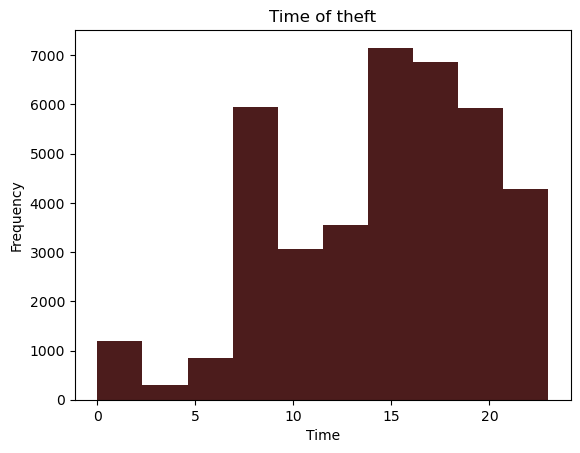

In [50]:
thefts_df_dedup['tatzeit_anfang_stunde'].plot(kind='hist', color='#4c1c1c')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time of theft')
plt.show()

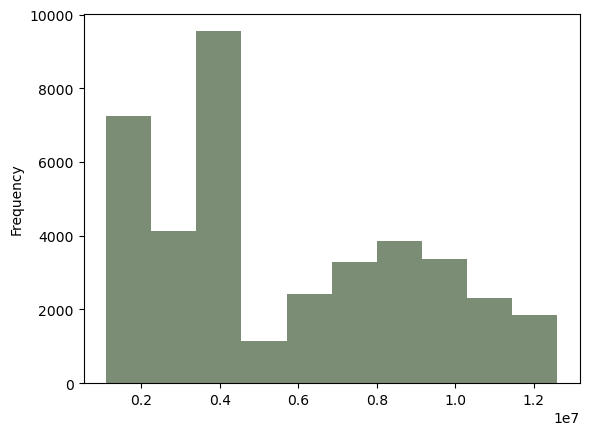

In [51]:
thefts_df_dedup['lor'].plot(kind='hist', color='#7b8d75');

Here I see where the most thefts occured in Berlin. However, since the LOR (Local Organizational Region) of Berlin is not clear enough, let's plot this info into a map. For this I will a df with the information of lor code, address and count of thefts.

There are two files: one contains the latitude and longitude and another the address. I will first merge them.

In [ ]:
#importing the info about the LOR (latitude and longitude)
lor_shapefile_path = "lor_2021-01-01_k3_shapefiles_nur_id\LOR_2023-01-01_PLR_EPSG_25833_nur_ID.shp"
gdf_lor = gpd.read_file(lor_shapefile_path)

In [53]:
#checking how this new geodataframe looks like
gdf_lor.head()

,PLR_ID,geometry
0,08401245,"POLYGON ((397994.196 5806511.717, 397993.956 5..."
1,08401244,"POLYGON ((398223.600 5807886.460, 398227.359 5..."
2,08401246,"POLYGON ((397747.159 5808365.587, 397773.792 5..."
3,08401243,"POLYGON ((397023.730 5809326.070, 397109.311 5..."
4,08401242,"POLYGON ((397023.730 5809326.070, 397041.045 5..."


In [54]:
gdf_lor.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PLR_ID    542 non-null    object  
 1   geometry  542 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 8.6+ KB


In [56]:
#now it is return of the address
address_df = pd.read_excel('./data/address_df.xlsx', sheet_name='LOR_2023_PLR')
address_df.head()

,PLR_ID,PLR_Name
0,1100101,Stülerstraße
1,1100102,Großer Tiergarten
2,1100103,Lützowstraße
3,1100104,Körnerstraße
4,1100205,Wilhelmstraße


In [57]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLR_ID    542 non-null    int64 
 1   PLR_Name  542 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.6+ KB


The merge will be on column PLR_ID and for this they need to have the same dtype. Let's change the dtype of address_df.PLR_ID to object.

In [58]:
address_df['PLR_ID'] = address_df['PLR_ID'].astype(str)
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLR_ID    542 non-null    object
 1   PLR_Name  542 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


In [59]:
#in order to merge the two dfs into a new one, I need to drop the first zero of gdf_lor.PLR_ID so it can match
gdf_lor['PLR_ID'] = gdf_lor['PLR_ID'].str.lstrip('0')
gdf_lor.head()

,PLR_ID,geometry
0,8401245,"POLYGON ((397994.196 5806511.717, 397993.956 5..."
1,8401244,"POLYGON ((398223.600 5807886.460, 398227.359 5..."
2,8401246,"POLYGON ((397747.159 5808365.587, 397773.792 5..."
3,8401243,"POLYGON ((397023.730 5809326.070, 397109.311 5..."
4,8401242,"POLYGON ((397023.730 5809326.070, 397041.045 5..."


In [60]:
#we can now merge
lor_address = gdf_lor.merge(address_df, on='PLR_ID', how='inner')
lor_address.head()

,PLR_ID,geometry,PLR_Name
0,8401245,"POLYGON ((397994.196 5806511.717, 397993.956 5...",Frauenviertel
1,8401244,"POLYGON ((398223.600 5807886.460, 398227.359 5...",Waßmannsdorfer Chaussee
2,8401246,"POLYGON ((397747.159 5808365.587, 397773.792 5...",Waltersdorfer Chaussee Ost
3,8401243,"POLYGON ((397023.730 5809326.070, 397109.311 5...",Alt-Rudow
4,8401242,"POLYGON ((397023.730 5809326.070, 397041.045 5...",Zittauer Straße


In [63]:
#renaming certain columns for better comprehension and further merging
lor_address.rename(columns={'PLR_ID': 'lor', 'PLR_Name': 'address'}, inplace=True)
lor_address.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lor       542 non-null    object  
 1   geometry  542 non-null    geometry
 2   address   542 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 16.9+ KB


In [64]:
#Merging the adress info into the main df. First, let's check the dtype of the main df
thefts_df_dedup.lor.info()

<class 'pandas.core.series.Series'>
Int64Index: 39137 entries, 0 to 39406
Series name: lor
Non-Null Count  Dtype
--------------  -----
39137 non-null  int64
dtypes: int64(1)
memory usage: 611.5 KB


Here I notice that the column lor in the main dataframe is not the same as the column lor in the lor_address. Therefore, I need to change the dtype

In [65]:
thefts_df_dedup['lor'] = thefts_df_dedup['lor'].astype(str)

Now let's merge them

In [66]:
thefts_merged = thefts_df_dedup.merge(lor_address, on='lor', how='outer')

In [67]:
thefts_merged.head()

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,geometry,address
0,2020-09-10,10.0,2020-09-10,12.0,3400723,706.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
1,2020-10-03,14.0,2020-10-03,19.0,3400723,399.0,Nein,Fahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
2,2021-08-09,8.0,2021-08-09,11.0,3400723,390.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
3,2020-10-05,13.0,2020-10-05,13.0,3400723,1289.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
4,2021-08-16,12.0,2021-08-16,13.0,3400723,250.0,Nein,Herrenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz


Since I am interested in in the areas with the highest number of thefts, I will create a new df

In [69]:
#new df with the count of thefts per lor
theft_lor = thefts_merged.groupby('lor').size().reset_index(name='count')
#new df were only the lor codes with more than 100 thefts are kept
theft_more_100 = theft_lor[theft_lor['count'] > 100]
#new df with the map info (latitude and longitude) 
thefts_merged = lor_address.merge(theft_more_100, on='lor', how='inner')

In [70]:
#this df keeps the total number of thefts per lor code
theft_lor.head()

,lor,count
0,10100101,38
1,10100102,12
2,10100103,22
3,10100104,24
4,10100205,10


In [71]:
#this df only has the lor codes with more than 100 thefts
theft_more_100.head()

,lor,count
42,1100102,148
43,1100103,117
44,1100104,102
46,1100206,187
47,1100207,153


In [72]:
#this df has the lor code + latitude and longitude of location with more than 100 thefts + address
thefts_merged.head()

,lor,geometry,address,count
0,8100418,"POLYGON ((395167.565 5814848.427, 395163.220 5...",Hertzbergplatz,132
1,8100416,"POLYGON ((394642.027 5815057.224, 394642.183 5...",Alt-Rixdorf,107
2,8100417,"POLYGON ((394642.027 5815057.224, 394657.836 5...",Braunschweiger Straße,171
3,8100415,"POLYGON ((394642.027 5815057.224, 394633.665 5...",Ganghoferstraße,113
4,8100208,"POLYGON ((394143.689 5814593.516, 394148.472 5...",Körnerpark,148


Let's plot the map on the locations in Berlin with the highest number of thefts

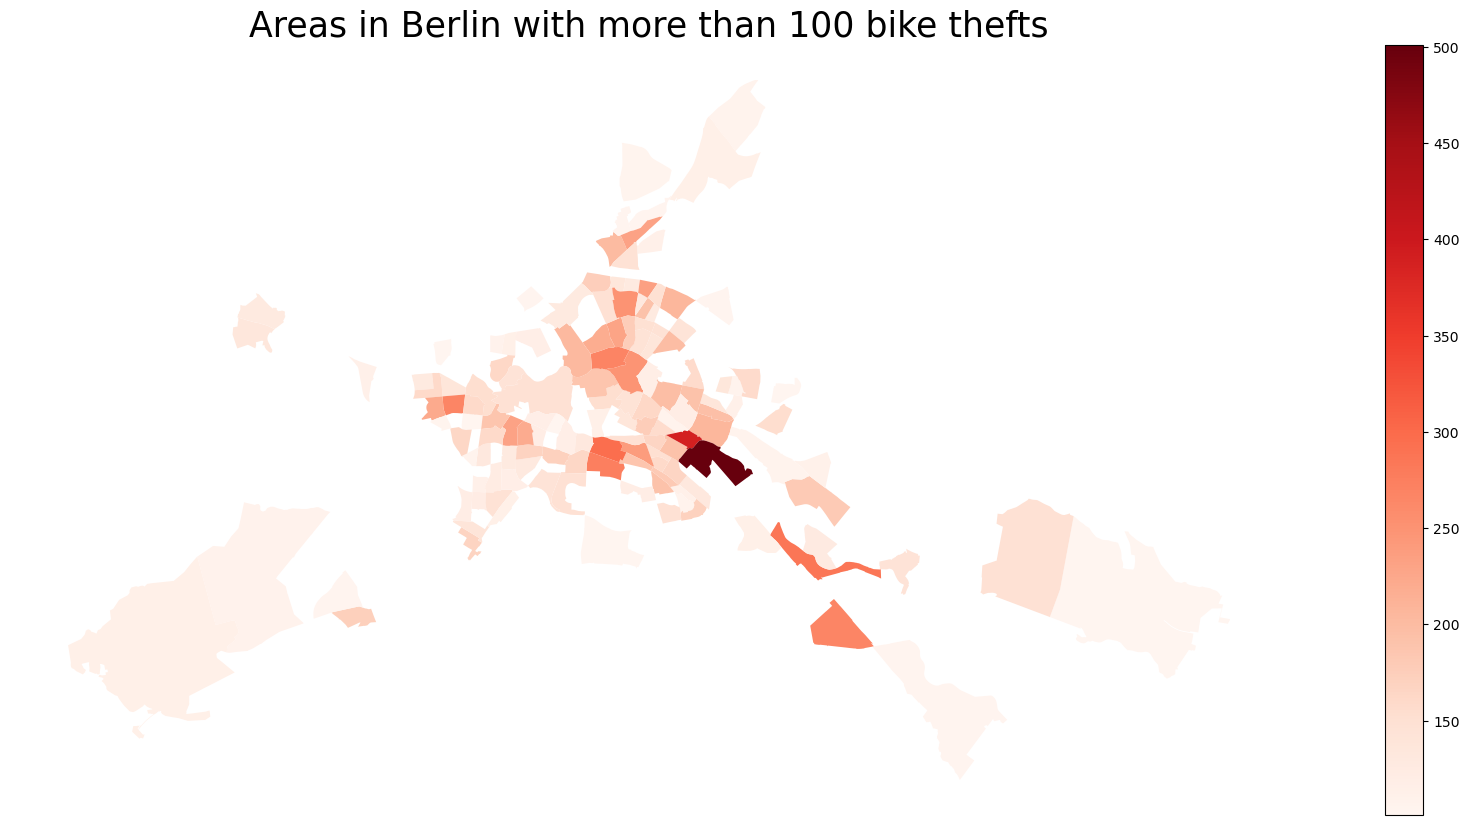

In [73]:
fig, ax = plt.subplots(figsize=(25, 10))
thefts_merged.plot(column='count', cmap='Reds', linewidth=3.5, legend=True, ax=ax)
plt.title("Areas in Berlin with more than 100 bike thefts", fontsize=25)
ax.set_axis_off()
plt.show()

The color red represents the number of thefts per area in Berlin. There is a location that pop out the most, which is the location with the highest number of thefts. Let's discover where is it.

In [74]:
thefts_merged.sort_values(by='count', ascending=False).head()

,lor,geometry,address,count
123,9100101,"POLYGON ((395303.042 5816192.240, 395282.544 5...",Alt-Treptow,501
40,2300419,"POLYGON ((395006.204 5817501.050, 394964.371 5...",Wrangelkiez,389
126,2200210,"POLYGON ((391720.949 5816634.965, 391719.446 5...",Urbanstraße,296
121,9200613,"POLYGON ((398054.544 5814222.280, 398054.599 5...",Bahnhof Schöneweide,286
42,2200211,"POLYGON ((391782.526 5815929.353, 391772.326 5...",Chamissokiez,275


9100101 = Alt-Treptow 
Alt-Treptow had more than 500 thefts between 2020-01-01 and 2021-11-28

Let's plot the map of all the thefts and not only of the locations with more than 100 thefts. For this, let's merge gdf_lor and theft_lor

In [75]:
all_thefts_merged = lor_address.merge(theft_lor, on='lor', how='inner')
all_thefts_merged.head()

,lor,geometry,address,count
0,8401245,"POLYGON ((397994.196 5806511.717, 397993.956 5...",Frauenviertel,10
1,8401244,"POLYGON ((398223.600 5807886.460, 398227.359 5...",Waßmannsdorfer Chaussee,62
2,8401246,"POLYGON ((397747.159 5808365.587, 397773.792 5...",Waltersdorfer Chaussee Ost,15
3,8401243,"POLYGON ((397023.730 5809326.070, 397109.311 5...",Alt-Rudow,37
4,8401242,"POLYGON ((397023.730 5809326.070, 397041.045 5...",Zittauer Straße,15


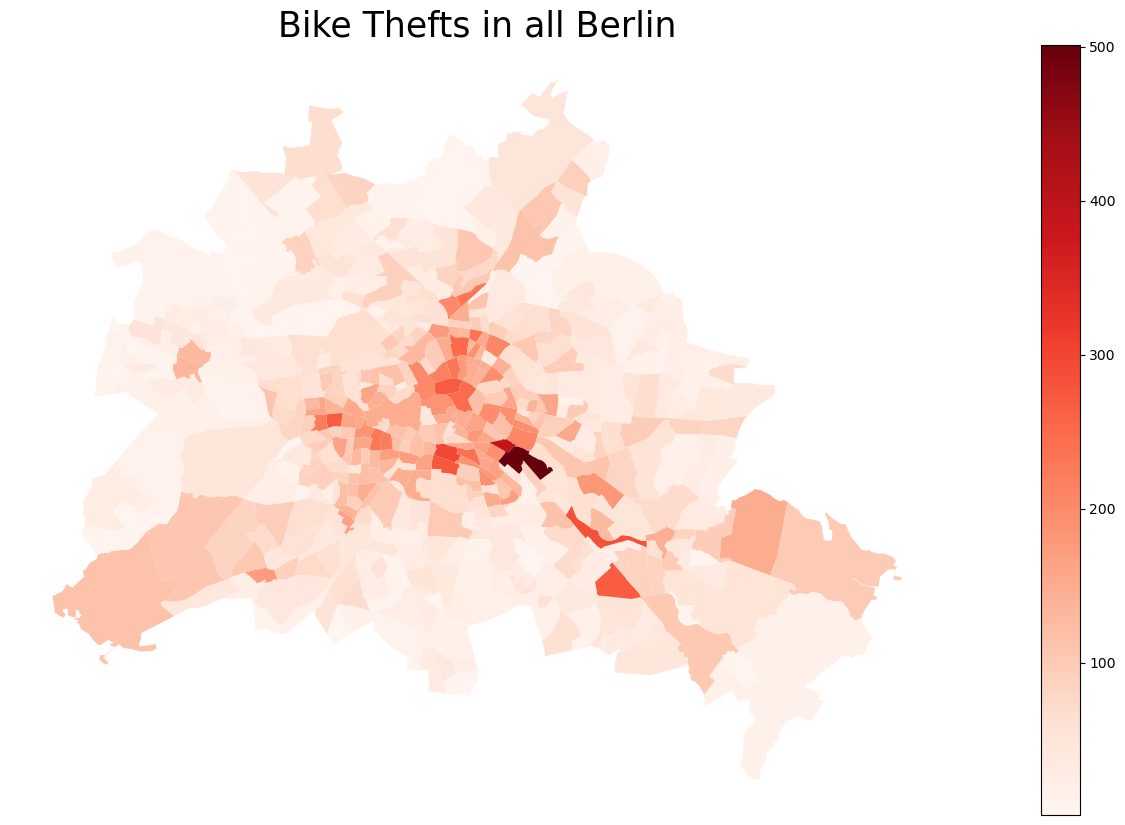

In [76]:
fig, ax = plt.subplots(figsize=(25, 10))
all_thefts_merged.plot(column='count', cmap='Reds', linewidth=3.5, legend=True, ax=ax)
plt.title("Bike Thefts in all Berlin", fontsize=25)
ax.set_axis_off()
plt.show()

Let's get the top 5

In [82]:
all_thefts_merged.sort_values(by='count', ascending=False)

,lor,geometry,address,count
481,9100101,"POLYGON ((395303.042 5816192.240, 395282.544 5...",Alt-Treptow,501
142,2300419,"POLYGON ((395006.204 5817501.050, 394964.371 5...",Wrangelkiez,389
485,2200210,"POLYGON ((391720.949 5816634.965, 391719.446 5...",Urbanstraße,296
475,9200613,"POLYGON ((398054.544 5814222.280, 398054.599 5...",Bahnhof Schöneweide,286
144,2200211,"POLYGON ((391782.526 5815929.353, 391772.326 5...",Chamissokiez,275
...,...,...,...,...
191,4400725,"POLYGON ((382090.598 5816730.652, 382077.331 5...",Güterbahnhof Grunewald,2
352,3300515,"POLYGON ((394646.862 5826865.537, 394654.029 5...",Blankenburger Süden,1
199,6200418,"POLYGON ((386200.054 5807473.687, 386199.629 5...",Landweg,1
251,5200419,"POLYGON ((373983.874 5822490.334, 373989.452 5...",Am Heideberg,1


Alt-Treptow, Wrangelkiez, Urbanstraße, Bahnhof Schöneweide and Chamissokiez.

In [85]:
#Let's create a df with all the data
all_thefts_berlin = thefts_df_dedup.merge(lor_address, on='lor', how='outer')
all_thefts_berlin.head()

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,geometry,address
0,2020-09-10,10.0,2020-09-10,12.0,3400723,706.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
1,2020-10-03,14.0,2020-10-03,19.0,3400723,399.0,Nein,Fahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
2,2021-08-09,8.0,2021-08-09,11.0,3400723,390.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
3,2020-10-05,13.0,2020-10-05,13.0,3400723,1289.0,Nein,Damenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
4,2021-08-16,12.0,2021-08-16,13.0,3400723,250.0,Nein,Herrenfahrrad,Fahrraddiebstahl,"POLYGON ((392026.298 5825018.011, 392023.101 5...",Garbátyplatz
